### 4월 22일 강의 01

$ \alpha = \beta $

> 들여쓰기  줄바꿈

>> 들여쓰기

tensorflow
>Network -> compile -> fit


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input

import numpy as np



In [12]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(2,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10, activation='linear'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               300       
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 11,410
Trainable params: 11,410
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.predict(np.random.randn(3,2))

1/1 [==============================] - 0s 20ms/step


array([[-0.66549027,  0.07036547, -0.48954317,  0.4111393 ,  0.07007486,
        -0.8038564 , -0.16868831,  0.3114983 ,  0.8534217 ,  0.0143221 ],
       [-0.6652695 ,  0.07332818, -0.4850232 ,  0.4081615 ,  0.07139039,
        -0.8022995 , -0.1927431 ,  0.3598176 ,  0.8599129 ,  0.01257676],
       [-0.6687134 ,  0.06815453, -0.4894147 ,  0.40456864,  0.06660163,
        -0.8038722 , -0.16509195,  0.30162227,  0.8516815 ,  0.01732473]],
      dtype=float32)

In [18]:
layer1 = Dense(100, activation='relu', input_shape=(2,))
layer2 = Dense(50, activation='relu')
layer3 = Dense(10, activation='softmax')

model = Sequential()
model.add(layer1)
model.add(layer2)
model.add(layer3)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               300       
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 10)                510       
                                                                 
Total params: 5,860
Trainable params: 5,860
Non-trainable params: 0
_________________________________________________________________


In [24]:
model = Sequential([
    layer1,
    layer2,
    layer3
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               300       
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 10)                510       
                                                                 
Total params: 5,860
Trainable params: 5,860
Non-trainable params: 0
_________________________________________________________________


In [27]:
input_ = Dense(100,activation='relu')
input_ = Input(shape=(2,))
layer1 = Dense(100, activation='relu')
layer2 = Dense(50, activation='relu')
layer3 = Dense(10, activation='relu')

x = layer1(input_)
x = layer2(x)
x = layer3(x)

model = Model(inputs=[input_], outputs=[x])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_16 (Dense)            (None, 100)               300       
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 10)                510       
                                                                 
Total params: 5,860
Trainable params: 5,860
Non-trainable params: 0
_________________________________________________________________


In [39]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) =mnist.load_data()
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

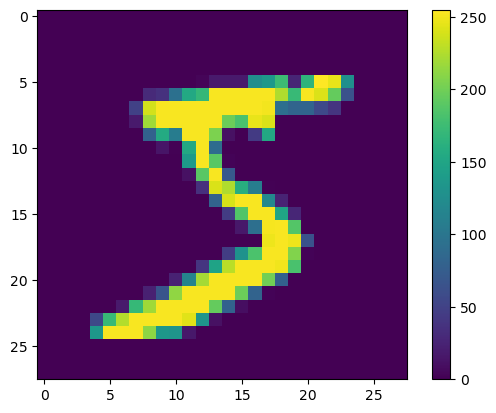

In [40]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [41]:
y_train = to_categorical(y_train)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [50]:
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1]*X_train.shape[2],)),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 100)               78500     
                                                                 
 dense_27 (Dense)            (None, 50)                5050      
                                                                 
 dense_28 (Dense)            (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [53]:
X_0 = X_train[0].reshape(1, 28*28)
model.predict(X_0)

1/1 [==============================] - 0s 11ms/step


7

In [54]:
np.nansum(-y_train[[0]] * np.log(model.predict(X_0)))

1/1 [==============================] - 0s 32ms/step


/tmp/ipykernel_8523/2077768411.py:1: RuntimeWarning: divide by zero encountered in log
  np.nansum(-y_train[[0]] * np.log(model.predict(X_0)))
/tmp/ipykernel_8523/2077768411.py:1: RuntimeWarning: invalid value encountered in multiply
  np.nansum(-y_train[[0]] * np.log(model.predict(X_0)))


52.39627

In [61]:
np.dot(X_train.reshape(-1,28*28)[0],  model.layers[0].get_weights()[0])

array([ -81.332275 ,  197.56544  ,   29.275593 ,   28.592314 ,
        -57.950108 ,   -1.3138216,  -21.680984 ,   95.36957  ,
        -97.49809  ,  -94.97157  ,  194.0015   ,   51.050453 ,
       -119.18136  ,   31.420944 ,   23.250895 , -127.39055  ,
         54.310844 ,   35.656567 ,   85.985725 ,  -83.79299  ,
        -73.24609  ,  158.09354  ,   42.520203 ,  -31.904665 ,
         88.715775 ,  205.91165  , -249.70761  ,   49.3846   ,
        -53.37856  ,   -6.1255465,  -44.63754  ,  418.62082  ,
        -52.816032 ,  -61.804672 ,  110.78518  ,   -2.496747 ,
       -121.99622  ,  -56.25107  ,   37.760372 ,  -20.459875 ,
       -317.99942  , -133.57253  , -149.11107  ,  -29.434649 ,
       -158.59225  ,  148.66635  ,   23.58783  , -109.63659  ,
         50.398117 ,   45.291805 ,   33.599297 ,   77.924484 ,
         69.6947   , -212.24632  , -132.33688  ,  183.32875  ,
       -176.63724  ,  -71.44214  , -151.69867  ,  -64.21558  ,
         53.202435 ,   -5.720846 , -183.97256  ,  206.4

In [64]:
from tensorflow.keras.layers import ReLU

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1]*X_train.shape[2],)),
    Dense(64),
    ReLU(),
    Dense(10, activation='softmax')
])

(X_train, y_train), (X_test, y_test) = mnist.load_data();

X_train.shape, y_train.shape

X_train_trans = X_train.reshape(-1, 28*28)
y_train_trans = to_categorical(y_train)
opt = 'sgd'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=opt,
              loss=loss,
              metrics=metrics)

model.fit(X_train_trans, y_train_trans, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 1s 11ms/step - loss: 71366168.0000 - accuracy: 0.1112
Epoch 2/10
60/60 [==============================] - 1s 17ms/step - loss: 2.4562 - accuracy: 0.1124
Epoch 3/10
60/60 [==============================] - 1s 15ms/step - loss: 2.3021 - accuracy: 0.1124
Epoch 4/10
60/60 [==============================] - 1s 25ms/step - loss: 2.3020 - accuracy: 0.1124
Epoch 5/10
60/60 [==============================] - 1s 15ms/step - loss: 2.3019 - accuracy: 0.1124
Epoch 6/10
60/60 [==============================] - 1s 18ms/step - loss: 2.3018 - accuracy: 0.1124
Epoch 7/10
60/60 [==============================] - 1s 17ms/step - loss: 2.3017 - accuracy: 0.1124
Epoch 8/10
60/60 [==============================] - 2s 25ms/step - loss: 2.3017 - accuracy: 0.1124
Epoch 9/10
60/60 [==============================] - 1s 22ms/step - loss: 2.3016 - accuracy: 0.1124
Epoch 10/10
60/60 [==============================] - 1s 18ms/step - loss: 2.3016 - accuracy: 0.1124


In [67]:
np.argmax(model.predict(X_train[[0]].reshape(1,784)))

first = []

for i in range(10):
    first.append(np.argmax(model.predict(X_train[[i]].reshape(1,784))))

print(first)

1/1 [==============================] - 0s 60ms/step
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [68]:
opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=opt,
              loss=loss,
              metrics=metrics)

model.fit(X_train_trans, y_train_trans, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.301

In [70]:
np.argmax(model.predict(X_train[[1]].reshape(1,784)))

1/1 [==============================] - 0s 21ms/step


1